# Final Project Submission

Please fill out:
* Student name: Bronwen Cohn-Cort
* Student pace: self-paced
* Scheduled project review date/time: Nov. 1 9-10 AM Eastern US
* Instructor name: Eli


My approach to the project through the OSEMN framework is to obtain the data as a DataFrame, iterate through the Scrub, Explore and Model steps to transform and discard columns, and iNterpret the results.  I will check to remove columns with missing values and transform those remaining in order to meet assumptions for a linear regression model.  Of those that would qualify for a linear regression model, I will then use `sci-kit learn` to narrow down the best predictors of the target variable sale price.

## Obtain
I read in the CSV file and look at the types of data contained within, and some other qualities of the data.

In [199]:
import pandas as pd
kc_data = pd.read_csv('kc_house_data.csv')
kc_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [2]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
print(kc_data["condition"].nunique())
kc_data["condition"].value_counts()

5


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [5]:
print(kc_data["grade"].nunique())
kc_data["grade"].value_counts()

11


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [7]:
print(kc_data["sqft_basement"].nunique())
kc_data["sqft_basement"].value_counts().head()

304


0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [8]:
print(kc_data["view"].nunique())
kc_data["view"].value_counts()

5


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
print(kc_data["zipcode"].nunique())
kc_data["zipcode"].value_counts().tail()

70


98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, dtype: int64

In [15]:
print(kc_data["id"].nunique())
kc_data["id"].value_counts().head()

21420


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

In [17]:
print(kc_data["yr_renovated"].nunique())
kc_data["yr_renovated"].value_counts().head()

70


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

## Scrub
I change the encoded types, create dummy variables, deal with nonsensical or missing values.

In [10]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

With `view` and `waterfront` being categorical columns containing several values of 0, null or missing, I will drop both.
Similarly, for `sqft_basement`, containing mainly 0 and 454 ? values.

In [200]:
#dropping view, waterfront, sqft_basement
drop_vwb = ["view","waterfront","sqft_basement"]
kc_data.drop(drop_vwb,axis=1,inplace=True)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(1)
memory usage: 3.0+ MB


Now the only column remaining with null values is `yr_renovated`.  Presumably these are newer houses that have never been renovated, but the most common value in the column is 0, which could also indicate a house has not been renovated.
With nearly all the values missing or 0, I will also drop the `yr_renovated` column.

In [201]:
kc_data.drop("yr_renovated",axis=1, inplace=True)
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#id, grade, condition and zipcode should not be treated as numbers
kc_data["id"]=kc_data["id"].astype("str")
kc_data["condition"]=kc_data["condition"].astype("category")
kc_data["grade"]=kc_data["grade"].astype("category")
kc_data["zipcode"]=kc_data["zipcode"].astype("str")
#date should be a datetime object
kc_data["date"]=pd.to_datetime(kc_data["date"])
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
id               21597 non-null object
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(2), datetime64[ns](1), float64(5), int64(7), object(2)
memory usage: 2.5+ MB


### Question 1: Is the `id` column an index?
I can compare how many unique values there are with how many total values in the `id` column.

In [202]:
kc_data.id.count()-kc_data.id.nunique()

177

The `id` column has 177 repeated values, which could indicate a few houses were sold many times within the year, or that several houses were sold twice.

In [24]:
#Looking at the top 10 repeating id's
kc_data.id.value_counts().head(10)

795000620     3
9353300600    2
5430300171    2
5536100020    2
1231000510    2
1219000473    2
1788800630    2
1423049019    2
3969300030    2
4139440480    2
Name: id, dtype: int64

The id that appears the most appears 3 times, and the second-most appears twice, which means the other repeated id's also appear only twice.

I will drop all of the repeated id's such that I am only considering houses that were sold once within the timespan of the dataset.

In order to do that, I will make a list containing all those indices of id's that repeat.

In [206]:
kc_data.loc[(kc_data.id==795000620) | (kc_data.id==1825069031)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.0,4,1.75,2410,8447,2.0,4,8,2060,1936,98074,47.6499,-122.088,2520,14789
3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,4,8,2060,1936,98074,47.6499,-122.088,2520,14789
17588,795000620,9/24/2014,115000.0,3,1.00,1080,6250,1.0,2,5,1080,1950,98168,47.5045,-122.330,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.00,1080,6250,1.0,2,5,1080,1950,98168,47.5045,-122.330,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,2,5,1080,1950,98168,47.5045,-122.330,1070,6250


It appears that the id's that appear multiple times have sequential indices in the dataframe.  This makes it simpler to create a list of those repeating id's.

In [5]:
id_indices=[]
for idx, num in enumerate(kc_data.id):#num is each id in the id column
    if idx==21596:
        break
    elif (num==kc_data.id[idx+1]):#checking the id is the same as the following
        #assuming each repeated id follows the same pattern as the two I already looked at
        id_indices.append(idx)
        id_indices.append(idx+1)
        #a special case for the thrice-repeated id:
        if num==kc_data.id[idx+2]:
            id_indices.append(idx+2)

I will remove all of these rows with the indices contained in `id_indices`.

In [6]:
kc_data.drop(labels=id_indices,axis=0,inplace=True)
#checking there are no repeated id values
kc_data.id.count()-kc_data.id.nunique()

0

In [28]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 18 columns):
id               21244 non-null object
date             21244 non-null datetime64[ns]
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
sqft_living      21244 non-null int64
sqft_lot         21244 non-null int64
floors           21244 non-null float64
condition        21244 non-null category
grade            21244 non-null category
sqft_above       21244 non-null int64
sqft_basement    21244 non-null object
yr_built         21244 non-null int64
zipcode          21244 non-null object
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
sqft_lot15       21244 non-null int64
dtypes: category(2), datetime64[ns](1), float64(5), int64(7), object(3)
memory usage: 2.8+ MB


In [29]:
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.124400e+04,21244.000000,21244.000000,21244.000000,2.124400e+04,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000
mean,5.423012e+05,3.374694,2.121022,2085.942902,1.515673e+04,1.497882,1793.752871,1971.186876,47.560301,-122.213587,1990.133920,12793.135332
std,3.681265e+05,0.924476,0.768462,919.517305,4.164963e+04,0.540477,829.627388,29.398604,0.138625,0.140857,685.856874,27417.178614
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,1952.000000,47.471375,-122.328000,1490.000000,5100.000000
50%,4.510000e+05,3.000000,2.250000,1920.000000,7.606000e+03,1.500000,1570.000000,1975.000000,47.572500,-122.229000,1840.000000,7620.000000
75%,6.471250e+05,4.000000,2.500000,2557.750000,1.069725e+04,2.000000,2220.000000,1997.000000,47.678100,-122.124000,2370.000000,10089.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Explore
I look at histograms, scatter plots, and check for multicollinearity and see which potential predictors for price might need to be normalized, transformed, binned, or are highly correlated.

### Histograms

<Figure size 864x1080 with 0 Axes>

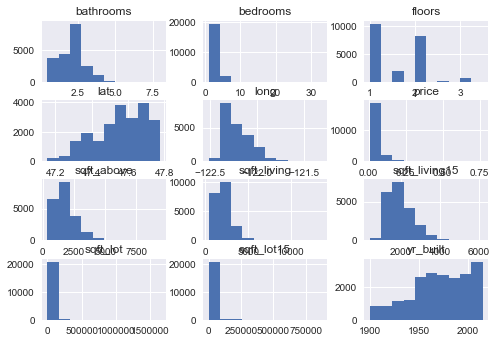

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
#looking at histograms for all columns
plt.style.use("seaborn")
plt.figure(figsize=(12,15))
kc_data.hist()
plt.show()

`yr_built` and `lat` appear to be right-skewed.
`long`, `sqft_above` and `sqft_living15` look similarly left-skewed.
`sqft_lot`, `sqft_lot15`, `price`, and `bedrooms` are highly left-skewed and have high kurtosis.
`bathrooms` also has high kurtosis, but is not far from a normal distribution.

### Scatter Plots

I will now look at scatterplots to get a sense of the linearity of the columns.

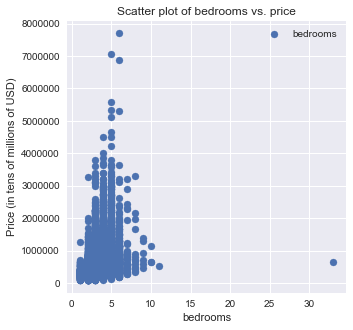

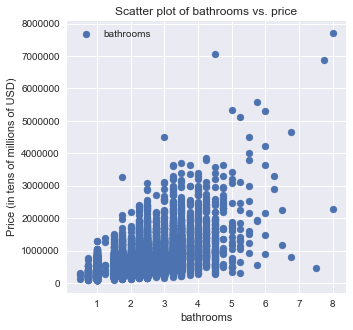

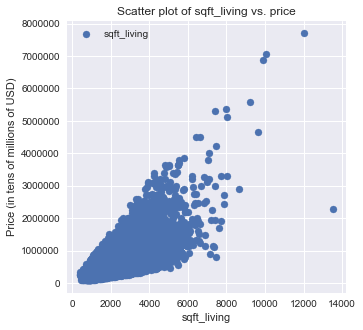

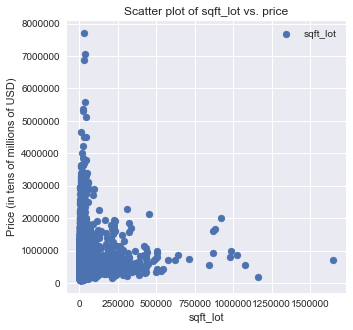

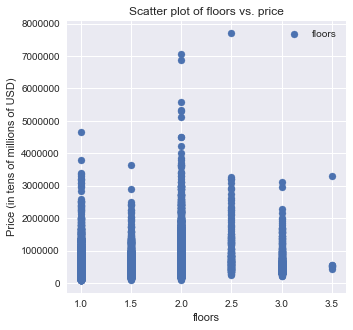

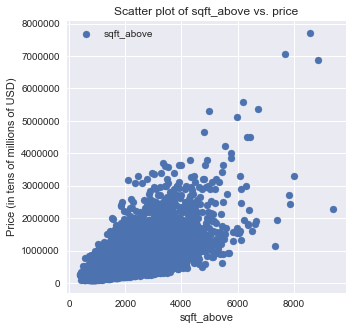

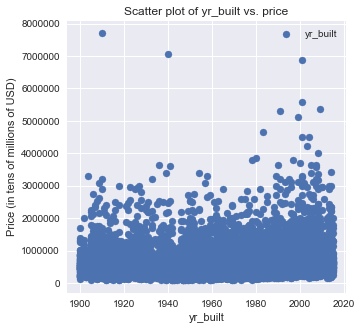

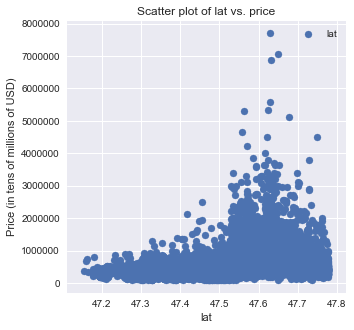

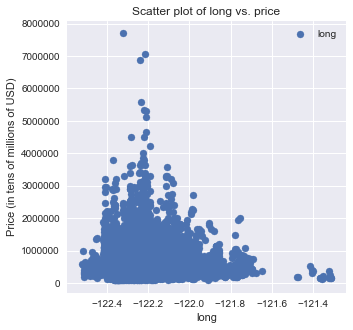

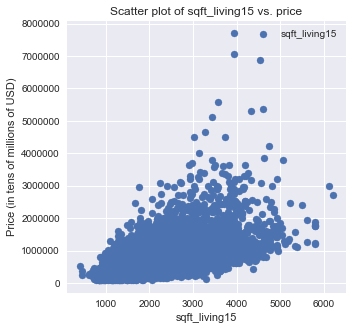

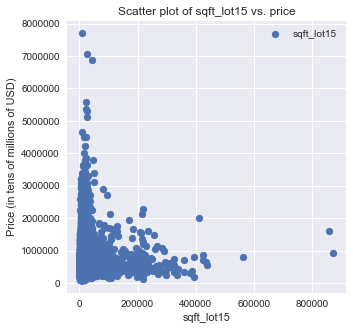

In [221]:
#creating a list of only the numeric values
plt.style.use("seaborn")
cols = ['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors', 'sqft_above',
 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
for col_name in cols:
    plt.figure(figsize=(5,5))
    plt.scatter(kc_data[col_name], kc_data["price"],label=col_name)
    plt.legend()
    plt.ylabel("Price (in tens of millions of USD)")
    plt.xlabel(col_name)
    plt.title(f"Scatter plot of {col_name} vs. price")
    plt.show()

Could be negatively correlated: `long`

Could be positively correlated, except for outliers: `bedrooms`,`lat`

Looks positively correlated, with some outliers: `bathrooms`, `sqft_living`, `sqft_above`,`sqft_living15`

Does not appear to have a linear relationship: `sqft_lot`, `yr_built`, `sqft_lot15`

Appears categorical: `floors`

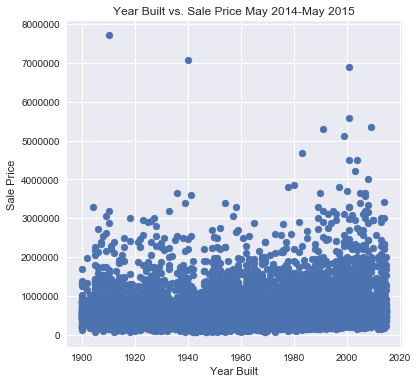

In [208]:
#saving scatterplot of yr_built for presentation
plt.style.use("seaborn")
plt.figure(figsize=(6,6))
plt.scatter(kc_data["yr_built"], kc_data["price"])
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Year Built vs. Sale Price May 2014-May 2015")
plt.savefig("yr_built_scatter.jpg")

### Multicollinearity
I will now determine to what degree values are correlated with each other.

In [43]:
import seaborn as sns
#if the absolute value of a correlation is more than .75, it is considered highly correlated
abs(kc_data.drop("price",axis=1).corr())>.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,True,False,False,False
long,False,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,False,False,True,False


The "True" values appear to be for `sqft_living` vs. `bathrooms`, `sqft_above` vs. `sqft_living` and `sqft_living` vs. `sqft_living15`.  As `sqft_living` is the value that appears to be highly correlated with three other variables, I will drop it in the next Scrub step.

### Conclusion of Explore Step:
- Drop the highly correlated `sqft_living` column
- Also drop the non-linear `sqft_lot`, `yr_built`, and `sqft_lot15`
- Change the `floors` variable to be categorical
- Reduce the skewness of `lat`, `long`, `sqft_above`, and `sqft_living15`
- Reduce the kurtosis and skew of `price`, `bedrooms`, and `bathrooms`
- Handle outliers from `bedrooms`, `lat`, `bathrooms`, `sqft_above`, and `sqft_living15`

### Question 2: How does the price vary with the date?
`date` is not shown on these plots, as it is an object.  I expect that houses may have different selling prices over the course of a year.

For instance, sellers may be more keen to move during warmer weather and thus settle for lower prices at those times of the year.

In the next Scrub step, I will add a column for the day of the year (1 to 365) to see in the subsequent Explore step how well it could predict house prices.

## Scrub 2
In the second go-around after looking at some visualizations, I wil one-hot encode categorical dummy columns, normalize data, minimize outliers and drop columns that would not help a regression model.

In [101]:
#drop highly-correlated and likely non-linear columns
drop_lotlivb=["sqft_living","sqft_lot","yr_built","sqft_lot15"]
pred_df=kc_data.drop(drop_lotlivb,axis=1)
pred_df.head(3)

,id,date,price,bedrooms,bathrooms,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,3,7,1180,98178,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,3,7,2170,98125,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,3,6,770,98028,47.7379,-122.233,2720


In [102]:
#change floors to be categorical
pred_df["floors"]=pred_df["floors"].astype("category")
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 13 columns):
id               21244 non-null object
date             21244 non-null datetime64[ns]
price            21244 non-null float64
bedrooms         21244 non-null int64
bathrooms        21244 non-null float64
floors           21244 non-null category
condition        21244 non-null category
grade            21244 non-null category
sqft_above       21244 non-null int64
zipcode          21244 non-null object
lat              21244 non-null float64
long             21244 non-null float64
sqft_living15    21244 non-null int64
dtypes: category(3), datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 1.8+ MB


#### Log Transformations and Normalizations

The skewness in `lat`, `long`,`sqft_living15`, `sqft_above`, `price`, `bedrooms`, and `bathrooms` can be reduced by using a log transformation.

In [103]:
#long is entirely negative values, so I will multiply the column by -1
pred_df["long"]=pred_df["long"]*(-1)
pred_df.describe()

,price,bedrooms,bathrooms,sqft_above,lat,long,sqft_living15
count,2.124400e+04,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000
mean,5.423012e+05,3.374694,2.121022,1793.752871,47.560301,122.213587,1990.133920
std,3.681265e+05,0.924476,0.768462,829.627388,0.138625,0.140857,685.856874
min,7.800000e+04,1.000000,0.500000,370.000000,47.155900,121.315000,399.000000
25%,3.249500e+05,3.000000,1.750000,1200.000000,47.471375,122.124000,1490.000000
50%,4.510000e+05,3.000000,2.250000,1570.000000,47.572500,122.229000,1840.000000
75%,6.471250e+05,4.000000,2.500000,2220.000000,47.678100,122.328000,2370.000000
max,7.700000e+06,33.000000,8.000000,9410.000000,47.777600,122.519000,6210.000000


The kurtosis of `price`, `bedrooms`, `bathrooms` and other variables can be managed by using a log function.  I will normalize `price` by using a standardization.

In [107]:
import numpy as np

scaled_long=np.log(pred_df["long"])

In [105]:
lprice=np.log(pred_df["price"])
scaled_price = (lprice-np.mean(lprice))/np.sqrt(np.var(lprice))

The effect of outliers in `bedrooms`, `lat`, `bathrooms`, `sqft_above`, and `sqft_living15` can be suppressed by using a min-max scaling.

In [108]:
import numpy as np

#using log to reduce the kurtosis
lbed=np.log(pred_df["bedrooms"])
llat=np.log(pred_df["lat"])
lbath=np.log(pred_df["bathrooms"])
labove=np.log(pred_df["sqft_above"])
ll15=np.log(pred_df["sqft_living15"])

#using min-max scaling to reduce the effect of outliers
scaled_bed = (lbed-min(lbed))/(max(lbed)-min(lbed))
scaled_lat = (llat-min(llat))/(max(llat)-min(llat))
scaled_bath = (lbath-min(lbath))/(max(lbath)-min(lbath))
scaled_above = (labove-min(labove))/(max(labove)-min(labove))
scaled_l15 = (ll15-min(ll15))/(max(ll15)-min(ll15))

In [109]:
#add newly-transformed variables to a new dataframe
scaled_df = pd.DataFrame([])
scaled_df["price"]=scaled_price
scaled_df["lat"]=scaled_lat
scaled_df["long"]=scaled_long
scaled_df["bathrooms"]=scaled_bath
scaled_df["bedrooms"]=scaled_bed
scaled_df["sqft_above"]=scaled_above
scaled_df["sqft_living15"]=scaled_l15

Looking at the categorical variables as predictors, by seeing how many categories there are.

In [48]:
cat_names=["floors","condition","grade","zipcode"]
for col in cat_names:
    print(pred_df[col].nunique())

6
5
11
70


An OLS regression model could use one-hot-encoded dummy variables for categorical variables.  However, `zipcode` would add almost 70 columns to the dataset, which would increase the runtime of the model.

Taking this into consideration, I will drop the zipcode column and only perform one-hot-encoding for the `floors`, `condition`, and `grade` columns.

In [110]:
#dropping zipcode column
pred_df.drop("zipcode",axis=1,inplace=True)

In [111]:
#creating dummy variables for floors, conditions and grade
fl_dummies = pd.get_dummies(pred_df["floors"],prefix="flrs")
co_dummies = pd.get_dummies(pred_df["condition"],prefix="cond")
gr_dummies=pd.get_dummies(pred_df["grade"],prefix="grade")

In [112]:
#combine dummies into dataframe as columns
dummy_df = pd.concat([fl_dummies,co_dummies,gr_dummies], axis=1)
dummy_df.head()

,flrs_1.0,flrs_1.5,flrs_2.0,flrs_2.5,flrs_3.0,flrs_3.5,cond_1,cond_2,cond_3,cond_4,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Question 2 Cont'd
The `date` column is changed to be purely the day of the year by using `dt.dayofyear`.

In [113]:
#new DataFrame with dummy columns, transformed values, and date as dayofyear
date_as_day=pred_df["date"].dt.dayofyear
pred2_df=pd.concat([scaled_df,date_as_day,dummy_df],axis=1)
pred2_df.head()

,price,lat,long,bathrooms,bedrooms,sqft_above,sqft_living15,date,flrs_1.0,flrs_1.5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-1.417865,0.573100,4.806125,0.250000,0.314203,0.358392,0.441342,286,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.272201,0.909499,4.806632,0.542481,0.314203,0.546652,0.525882,343,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.817218,0.936533,4.805929,0.250000,0.198240,0.226478,0.699256,56,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0.493023,0.588526,4.807237,0.646241,0.396480,0.322322,0.446739,343,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.170205,0.742607,4.804390,0.500000,0.314203,0.467563,0.548854,49,1,0,...,0,0,0,0,1,0,0,0,0,0


## Explore 2
I will look again at multicollinearity and double-check the data meets assumptions of normality, linearity and heteroscedasticity sufficiently for regression.

In [114]:
pred2_df.describe()

,price,lat,long,bathrooms,bedrooms,sqft_above,sqft_living15,date,flrs_1.0,flrs_1.5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
count,2.124400e+04,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,...,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000,21244.000000
mean,-1.837514e-14,0.651638,4.805770,0.495424,0.337050,0.458745,0.565524,184.500706,0.491056,0.087837,...,0.001271,0.010685,0.091885,0.414423,0.283233,0.122246,0.053003,0.018499,0.004095,0.000612
std,1.000024e+00,0.222696,0.001153,0.141230,0.080706,0.132056,0.119283,94.624812,0.499932,0.283064,...,0.035629,0.102819,0.288870,0.492634,0.450579,0.327578,0.224045,0.134752,0.063865,0.024730
min,-3.413044e+00,0.000000,4.798390,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.899480e-01,0.509076,4.805037,0.451839,0.314203,0.363586,0.479997,111.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.440947e-02,0.671544,4.805896,0.542481,0.314203,0.446637,0.556861,178.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.246303e-01,0.840833,4.806706,0.580482,0.396480,0.553691,0.649076,262.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.350454e+00,1.000000,4.808266,1.000000,1.000000,1.000000,1.000000,365.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
pred_cols = ["lat","long","bathrooms","bedrooms","sqft_above","sqft_living15","date"]

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


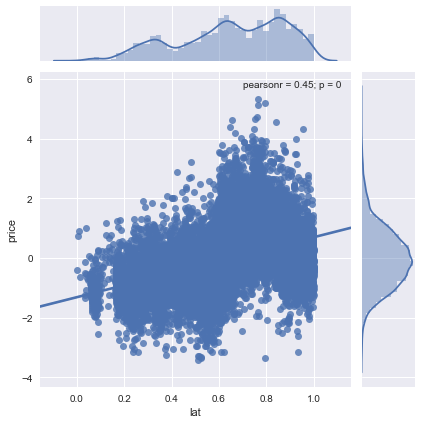

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


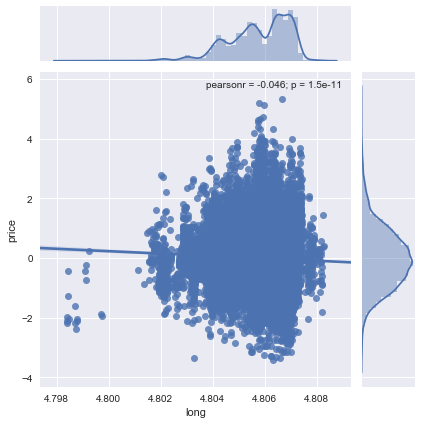

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


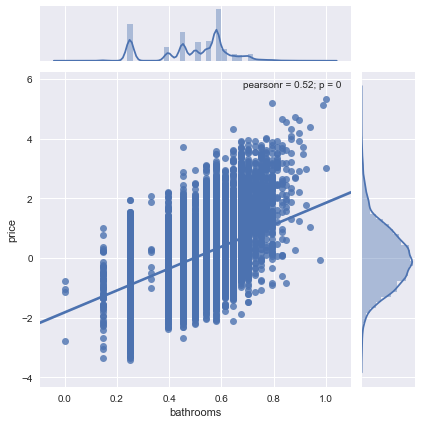

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


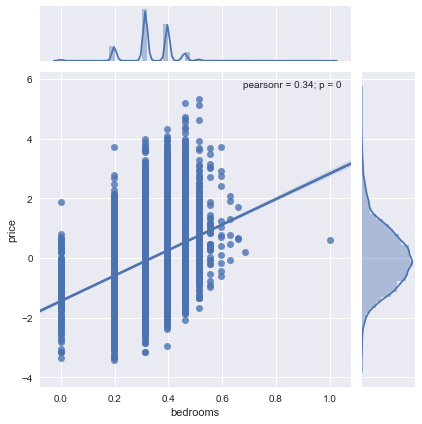

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


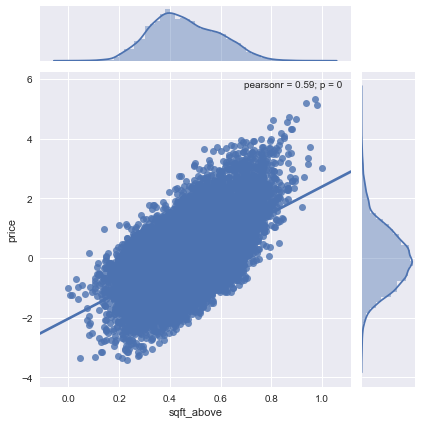

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


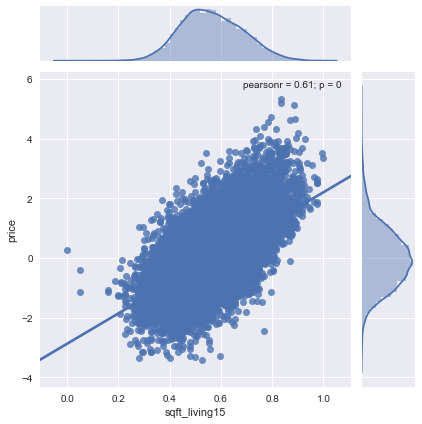

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


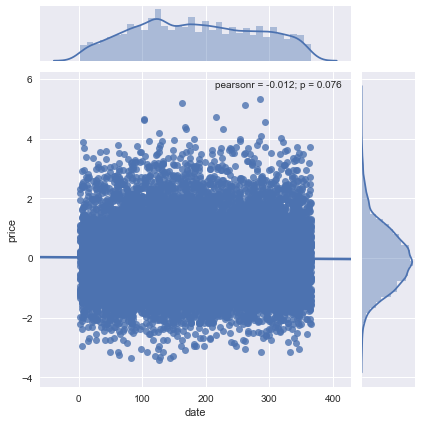

In [115]:
import seaborn as sns
for col_name in pred_cols:#using only continuous variables
    sns.jointplot(x= col_name, y= 'price', data=pred2_df, kind="reg",label=col_name)
    plt.show()

The normalized and linear variables appear to be `lat`, `long`, `sqft_above`, `sqft_living15`.

`bedrooms` and `bathrooms` look categorical, in a logarithmic way, so although they are not quite continuous, they are also not quite discrete, either.

How does my new predictors dataframe do with multicollinearity?  I will look at a seaborn heatmap to gain some idea.

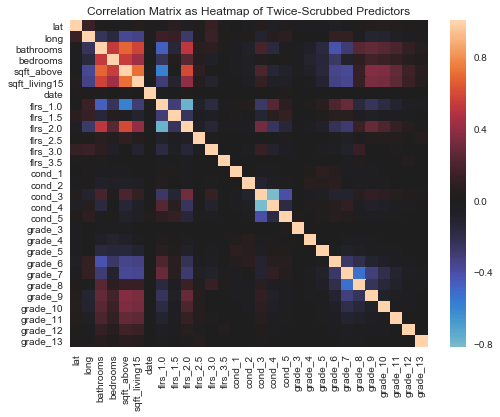

In [120]:
import seaborn as sns
corr_matr = pred2_df.drop("price",axis=1).corr()
plt.figure(figsize=(8,6))
plt.title("Correlation Matrix as Heatmap of Twice-Scrubbed Predictors")
sns.heatmap(corr_matr, center=0);

There appears to be some degree of correlation among the `bedrooms`,`sqft_above` and `sqft_living15` variables.

Two pairs of dummy variables also appear to be highly negatively correlated with each other, as we might expect most houses to have either 1 floor or 2 floors.  When removing one dummy variable from each categorical variable to prevent singularity in the model, I will be sure to remove the more highly correlated `flrs_1.0`, `cond_3`, and `grade_7`.

A regression model using highly correlated predictors would be less useful so I will just take a closer look at the correlation values for the `bedrooms`, `sqft_above` and `sqft_living15` columns.

In [118]:
scaled_df.drop("price",axis=1).corr()

,lat,long,bathrooms,bedrooms,sqft_above,sqft_living15
lat,1.000000,0.136998,0.008657,-0.029566,-0.021205,0.040582
long,0.136998,1.000000,-0.239179,-0.156872,-0.360749,-0.336220
bathrooms,0.008657,-0.239179,1.000000,0.535702,0.683123,0.569224
bedrooms,-0.029566,-0.156872,0.535702,1.000000,0.548459,0.429461
sqft_above,-0.021205,-0.360749,0.683123,0.548459,1.000000,0.714087
sqft_living15,0.040582,-0.336220,0.569224,0.429461,0.714087,1.000000


`sqft_above` and `sqft_living15` are only just below the 0.75 correlation threshold, so they will both remain predictors for the time being.

### Question 3: Does a house located near another house for sale have a higher price?

Null hypothesis: The closer a house is located (according to latitude or longitude) to another house that sold within the year, has no significant effect on the sale price.

Alternate hypothesis: Proximity to other houses sold within the year significantly increases or decreases the sale price of a house.

More than one column indicates where a house is located: `zipcode`, and `lat` and `long`. `lat` and `long` would provide simpler and precise measures of distance.

In [23]:
loc_df=pd.concat([pred_df["id"],scaled_df["lat"],scaled_df["long"],scaled_df["price"]],axis=1)
loc_df.head()

,id,lat,long,price
0,7129300520,0.573100,4.806125,-1.417865
1,6414100192,0.909499,4.806632,0.272201
2,5631500400,0.936533,4.805929,-1.817218
3,2487200875,0.588526,4.807237,0.493023
4,1954400510,0.742607,4.804390,0.170205


In [28]:
import math
def pyth(x1,y1,x2,y2):
    x=x2-x1
    y=y2-y1
    return math.sqrt((x**2)+(y**2))

pyth(1,2,4,6)#testing function

5.0

First, I'll look at the scatterplot of the latitude and longitude values.

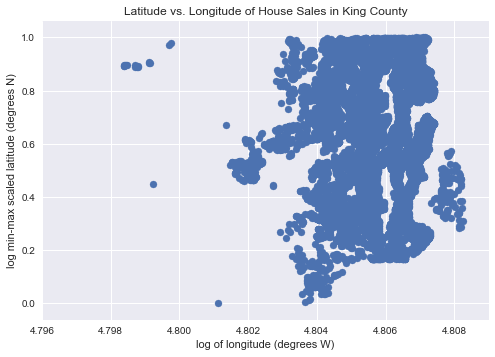

In [223]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = loc_df.long
y = loc_df.lat
plt.style.use("seaborn")
plt.xlim(4.796,4.809)#making features in the plot more visible
plt.xlabel("log of longitude (degrees W)")
plt.ylabel("log min-max scaled latitude (degrees N)")
plt.title("Latitude vs. Longitude of House Sales in King County")
plt.scatter(x,y)
plt.show()

In [29]:
#creating a shortest distance column
loc_df["distance"]=0

In [31]:
#resetting index since I dropped rows earlier, just to be sure
loc_df.reset_index(drop=True, inplace=True)

In [32]:
len(loc_df.lat)

21244

Answering this question would be interesting, but it's too much time for my computer; taking seconds to generate each `distance` value.  For the meantime, I will consider only the first six hundred values, which may take less than an hour although it is not even enough to make a 80-20 train-test split.

In [73]:
#creating a shortest distance column for 600-row dataframe
loc600_df = loc_df.loc[:600]
loc600_df["distance"]=0

#generating the values for the distance column
vals=len(loc_df.lat)
dist=pyth(min(loc_df.lat),min(loc_df.long),max(loc_df.lat),max(loc_df.long))#the farthest away any two could be

for i in range(0,600):#cycling through the DataFrame
        lat1=loc_df.loc[i,"lat"]#still using the original values from the longer dataframe
        long1=loc_df.loc[i,"long"]
        #taking the ith lat and long values
                
        for j in range(0,vals):#for each i in the first 600 rows, looking at every other lat & long pair
            if i == j:#not look at where i=j
                continue#on to next value of j
            lat2=loc_df.loc[j,"lat"]#comparing to every lat and long pair in the longer dataframe
            long2=loc_df.loc[j,"long"]
            new_dist=pyth(lat1,long1,lat2,long2)
            dist=min(dist,new_dist)#comparing newly-calculated distance and selecting the smaller
        
        loc600_df.loc[i,"distance"]=dist
        
        #resetting distance
        dist=pyth(min(loc_df.lat),min(loc_df.long),max(loc_df.lat),max(loc_df.long))#the farthest away any two could be
        
        if i == 3:
            print("made it to 3!")
        elif i ==310:
            print("reached 310 - halfway-ish")
        elif i == 590:
            print("this is 590")
print("all done")
loc600_df.to_csv("distance_data.csv")

C:\Users\Bronwen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bronwen\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


made it to 3!
reached 310 - halfway-ish
this is 590
all done


In [82]:
loc600_df.describe()

,lat,long,price,distance
count,601.000000,601.000000,601.000000,601.000000
mean,0.632294,4.805701,-0.051338,0.000166
std,0.227520,0.001149,1.010261,0.000174
min,0.034964,4.801633,-3.364729,0.000000
25%,0.453126,4.804971,-0.785994,0.000041
50%,0.657259,4.805790,-0.116203,0.000160
75%,0.833306,4.806657,0.606482,0.000204
max,1.000000,4.808029,3.601881,0.001426


It appears some values are zero, which may mean these houses are located within rounding error at the same coordinates as other houses.

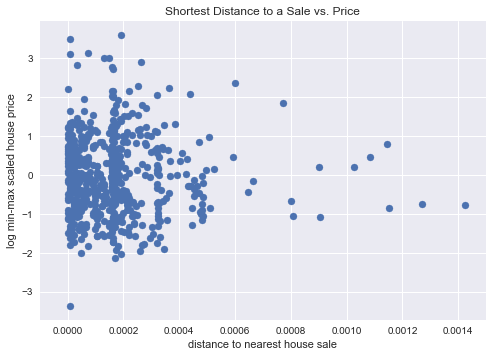

In [224]:
plt.style.use("seaborn")
plt.xlim(-0.0001,0.0015)
plt.xlabel("distance to nearest house sale")
plt.ylabel("log min-max scaled house price")
plt.title("Shortest Distance to a Sale vs. Price")
plt.scatter(loc600_df["distance"],loc600_df["price"])
plt.show()

The shortest distance among the first 600 values does not appear to have a linear relationship with price, and may lend itself better to binning.  There is a slight degree of negative correlation which could be stronger if looking at the whole dataset.

Otherwise, there appear to be clusters similar to categorical variables around 0, 0.00018, 0.00035 and 0.00047.

## Model
I use RFE and OLS to see which columns from the dataset best predict price.

In [122]:
#all the dummy columns should be categorical
#encoding columns as category type with a for loop:

for col_name in pred2_df.iloc[:,8:].columns:
    pred2_df[col_name]=pred2_df[col_name].astype('category')

In [124]:
pred2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21244 entries, 0 to 21596
Data columns (total 30 columns):
price            21244 non-null float64
lat              21244 non-null float64
long             21244 non-null float64
bathrooms        21244 non-null float64
bedrooms         21244 non-null float64
sqft_above       21244 non-null float64
sqft_living15    21244 non-null float64
date             21244 non-null int64
flrs_1.0         21244 non-null category
flrs_1.5         21244 non-null category
flrs_2.0         21244 non-null category
flrs_2.5         21244 non-null category
flrs_3.0         21244 non-null category
flrs_3.5         21244 non-null category
cond_1           21244 non-null category
cond_2           21244 non-null category
cond_3           21244 non-null category
cond_4           21244 non-null category
cond_5           21244 non-null category
grade_3          21244 non-null category
grade_4          21244 non-null category
grade_5          21244 non-null category

`pred2_df` will be the dataframe for modeling.  First, I will look at OLS models for each continuous column and categorical variable.

#### Continuous/Numerical OLS

In [133]:
import statsmodels.formula.api as smf
models_dict={}

In [134]:
cont_names=pred2_df.columns[1:8]

for col in cont_names:
    f = "price~"+col
    model=smf.ols(formula =f, data=pred2_df).fit()
    print("price and "+col)
    print(model.summary())
    models_dict[col]=model

price and lat
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5345.
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        19:37:30   Log-Likelihood:                -27760.
No. Observations:               21244   AIC:                         5.552e+04
Df Residuals:                   21242   BIC:                         5.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3120      0.019    -6

`lat` has 2.0134 coefficient, P>|t|=0 and R-squared and adj. R-squared of 0.201

`long` has -40.1402 coefficient, P>|t|=0 and R-squared and adj. R-squared of 0.002 and may have strong multicollinearity or other numerical problems

`bathrooms` has 3.6746 coefficient, P>|t|=0 and R-squared and adj. R-squared of 0.269

`bedrooms` has 4.2699 coefficient, P>|t|=0 and R-squared and adj. R-squared of 0.119

`sqft_above` has 4.4319 coefficient, P>|t|=0 and R-squared of 0.343 and adj. R-squared of 0.342

`sqft_living15` has 5.0806 coefficient, P>|t|=0 and R-squared and adj. R-squared of 0.367

`date` has -0.0001 coefficient, P>|t|=0.076 and R-squared and adj. R-squared of 0

All except `date`, which had no linearity, have p-values of 0.000, which is less than 0.05.  `long` may have an issue, as its coefficient is a quite large negative number and the OLS function cautioned that it may have numerical problems.

The values of adj. R-squared that are closest to 1 (a perfect fit) are 0.342 for `sqft_above` and 0.367 for `sqft_living15`, although none except for `date` and `long` are below 0.100 which indicates they are not extremely far from fitting a linear regression.

### Question 2 Concluded
The date, even when transformed to be a day of the year is unlikely to have a linear relationship with price.  However, `date` should maybe not have been considered a numerical variable for the OLS, as January 2, transformed into *2*, is not twice as big as January 1, transformed into *1*.

#### Categorical OLS

For categorical variables, they will have their own OLS (one each for `cond_`, `grade_` and `flrs_`).

I encountered an error with the `flrs_` dummy columns being named `flrs_3.0` when creating the formula for OLS, so I will rename the columns.

In [141]:
pred2_df.rename(index=str,columns={"flrs_1.0":"flrs_1",'flrs_1.5':'flrs_1_5', 'flrs_2.0':'flrs_2', 'flrs_2.5':'flrs_2_5', 'flrs_3.0':'flrs_3', 'flrs_3.5':'flrs_3_5'},inplace=True)
pred2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21244 entries, 0 to 21596
Data columns (total 30 columns):
price            21244 non-null float64
lat              21244 non-null float64
long             21244 non-null float64
bathrooms        21244 non-null float64
bedrooms         21244 non-null float64
sqft_above       21244 non-null float64
sqft_living15    21244 non-null float64
date             21244 non-null int64
flrs_1           21244 non-null category
flrs_1_5         21244 non-null category
flrs_2           21244 non-null category
flrs_2_5         21244 non-null category
flrs_3           21244 non-null category
flrs_3_5         21244 non-null category
cond_1           21244 non-null category
cond_2           21244 non-null category
cond_3           21244 non-null category
cond_4           21244 non-null category
cond_5           21244 non-null category
grade_3          21244 non-null category
grade_4          21244 non-null category
grade_5          21244 non-null category
grad

In [142]:
flrs_cols=list(pred2_df.columns[8:14])
cond_cols=list(pred2_df.columns[14:19])
grade_cols=list(pred2_df.columns[19:])

#making sure to drop one of each:
flrs_cols.remove("flrs_1")
cond_cols.remove("cond_3")
grade_cols.remove("grade_7")

cols_list=[flrs_cols,cond_cols,grade_cols]
for cols in cols_list:
    joint_cols="+".join(cols)
    f = "price~"+joint_cols
    model=smf.ols(formula =f, data=pred2_df).fit()
    print(model.summary())
    models_dict[cols[0]]=model #adding each model to the dictionary with the first column name as the keyword

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     541.7
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:02:18   Log-Likelihood:                -28869.
No. Observations:               21244   AIC:                         5.775e+04
Df Residuals:                   21238   BIC:                         5.780e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3279      0.009    -35.555

`flrs_` have an R-squared and adj. R-squared of 0.113, and all but one p-value of 0.

`cond_` have an R-squared and adj. R-squared of 0.013, and p-values of 0.

`grade_` have an R-squared of 0.497 and adj. R-squared of 0.496, and all but one p-value of 0.

The lone nonzero p-value in `grade_` is `grade_3` with a p-value of 0.330 and a coefficient of -0.6918.  0.330 is much larger than the customary threshold of 0.05, so it is unlikely to be an accurate part of the final model.

I will drop columns for continuous variables that had R-squared values less than 0.01 or looked problematic, and one column for each categorical variable.

In [143]:
#dropping date, long, flrs_1, cond_3, and grade_7
drop_dl=["date","long","flrs_1","cond_3","grade_7"]
pred3_df=pred2_df.drop(drop_dl,axis=1)
pred3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21244 entries, 0 to 21596
Data columns (total 25 columns):
price            21244 non-null float64
lat              21244 non-null float64
bathrooms        21244 non-null float64
bedrooms         21244 non-null float64
sqft_above       21244 non-null float64
sqft_living15    21244 non-null float64
flrs_1_5         21244 non-null category
flrs_2           21244 non-null category
flrs_2_5         21244 non-null category
flrs_3           21244 non-null category
flrs_3_5         21244 non-null category
cond_1           21244 non-null category
cond_2           21244 non-null category
cond_4           21244 non-null category
cond_5           21244 non-null category
grade_3          21244 non-null category
grade_4          21244 non-null category
grade_5          21244 non-null category
grade_6          21244 non-null category
grade_8          21244 non-null category
grade_9          21244 non-null category
grade_10         21244 non-null category


### Heteroscedasticity
A quick check for heteroscedasticity for the continuous variables by making Q-Q plots of their residuals from the model.

C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Bronwen\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show 

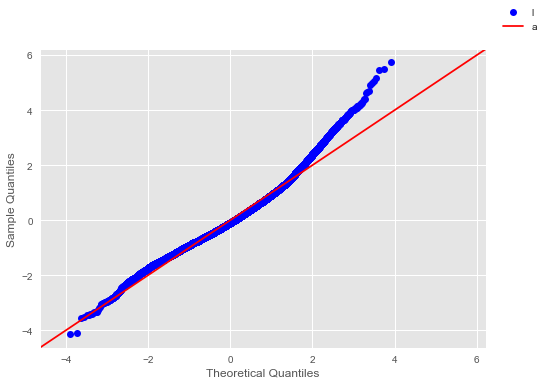

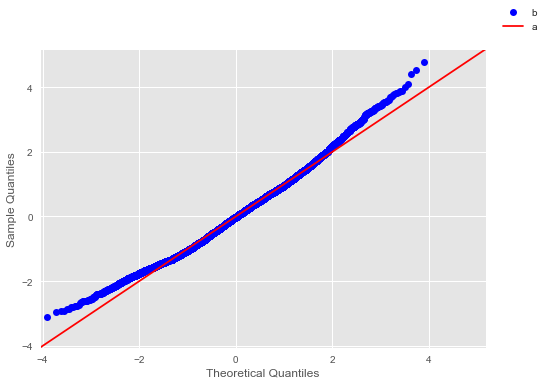

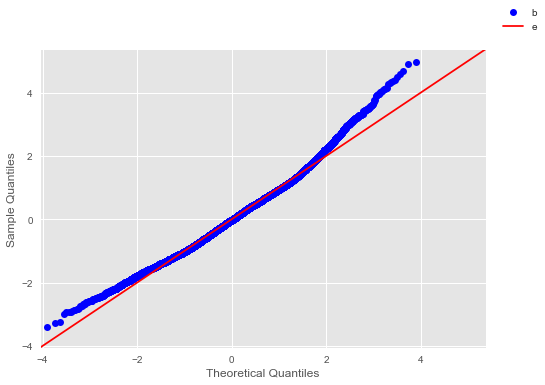

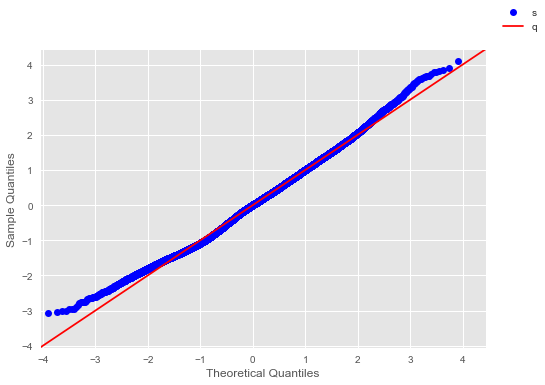

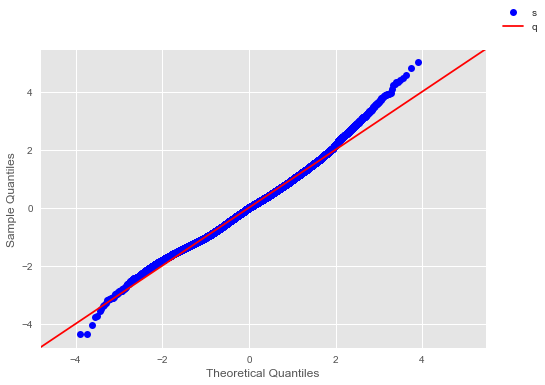

In [210]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

for key in models_dict:
    if (key =="date") or (key == "long"):
        continue
    elif (key.startswith("flrs_")):
        break
    else:
        model=models_dict[key]
        residuals = model.resid
        fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        fig.legend(key)
        fig.show()

From the Q-Q Plots, the first one is for `lat`, which appears to have the most variance.  Otherwise, the other continuous variables that are in the pred3_df have even less variance than `lat` and so meet the three assumptions necessary for a linear model.

Then, I will use RFE to choose the best predictors from all of them.

In [145]:
y = pred3_df[["price"]]
X = pred3_df.drop(["price"],axis=1)

,lat,bathrooms,bedrooms,sqft_above,sqft_living15,flrs_1_5,flrs_2,flrs_2_5,flrs_3,flrs_3_5,...,grade_3,grade_4,grade_5,grade_6,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0.573100,0.250000,0.314203,0.358392,0.441342,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.909499,0.542481,0.314203,0.546652,0.525882,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.936533,0.250000,0.198240,0.226478,0.699256,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.588526,0.646241,0.396480,0.322322,0.446739,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.742607,0.500000,0.314203,0.467563,0.548854,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [165]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [180]:
#looking at the top 6 features
select_n = RFE(linreg, n_features_to_select = 6)
select_n = select_n.fit(X, np.ravel(y))

selected_columns = X.columns[select_n.support_]
linreg.fit(X[selected_columns],y)
yhat = linreg.predict(X[selected_columns])
print(X[selected_columns].head())

        lat  sqft_above  sqft_living15 grade_3 grade_12 grade_13
0  0.573100    0.358392       0.441342       0        0        0
1  0.909499    0.546652       0.525882       0        0        0
2  0.936533    0.226478       0.699256       0        0        0
3  0.588526    0.322322       0.446739       0        0        0
4  0.742607    0.467563       0.548854       0        0        0


In [181]:
#SS_residual and SS_total
SSR = np.sum((y-yhat)**2)
SST = np.sum((y-np.mean(y))**2)

#to calculate R-squared and adj. R-squared
r_squared = 1 - (float(SSR))/SST
print(f"R-squared: {r_squared}")
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f"Adj. R-squared: {adjusted_r_squared}")

R-squared: price    0.616349
dtype: float64
Adj. R-squared: price    0.615915
dtype: float64


### Final Model
A final model containing the top three continuous features from the dataset: `lat`,`sqft_above`, and `sqft_living15`.

In [183]:
final_df=pd.concat([pred3_df["price"],pred3_df["lat"],pred3_df["sqft_above"],pred3_df["sqft_living15"]],axis=1)
final_df.head()

,price,lat,sqft_above,sqft_living15
0,-1.417865,0.573100,0.358392,0.441342
1,0.272201,0.909499,0.546652,0.525882
2,-1.817218,0.936533,0.226478,0.699256
3,0.493023,0.588526,0.322322,0.446739
4,0.170205,0.742607,0.467563,0.548854


In [189]:
#creating another OLS model to look at:
import statsmodels.formula.api as smf

col_names=final_df.drop("price",axis=1).columns
joint_cols="+".join(col_names)#joining all column names except price to the formula
f = "price~"+joint_cols

model=smf.ols(formula =f, data=final_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 1.103e+04
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        21:38:48   Log-Likelihood:                -20167.
No. Observations:               21244   AIC:                         4.034e+04
Df Residuals:                   21240   BIC:                         4.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.1141      0.024   -172.050

## Interpret
As the three coefficients of my final model are not zero, there is some positive relationship between the `lat`, `sqft_above`, and `sqft_living15` and the sale price of a house in the provided King County dataset.  Since the p-values for each are less than 0.05, I can say that I am 95% confident that these three values are predictive of house sale price, and with 0.609 adjusted R-squared, they explain 60% of the variations in the dependent variable sale price.

The coefficients for them are positive, although `lat` is lower than the other two.
As they and the target were all transformed through min-max scaling and a log transformation, I can say that for at least every 2.5 units of increase in log min-max sqft_above, log min-max price increases by 1 unit.